## Try some bond dissociations of PFAS molecules

In [1]:
from nbed.utils import (
    pubchem_mol_geometry,
    build_ordered_xyz_string,
    save_ordered_xyz_file,
)

pfoa = pubchem_mol_geometry("Perfluorooctanoic acid")
pfoa_ordered = build_ordered_xyz_string(pfoa, active_atom_inds=[2, 20])
save_ordered_xyz_file("pfoa", pfoa, active_atom_inds=[2, 20])

/dss/dsshome1/07/di46kaw/Nbed/.venv/lib64/python3.9/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '
/dss/dsshome1/07/di46kaw/Nbed/.venv/lib64/python3.9/site-packages/pubchempy.py:563: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if self.charge is not 0:


'/dss/dsshome1/07/di46kaw/Nbed/docs/notebooks/molecular_structures/pfoa.xyz'

In [2]:
import numpy as np

def find_closest(geometry: dict, start_index: int, element: str):
    initial_atom = geometry[start_index][1]
    dist = 999
    for i, atom in geometry.items():
        if i == start_index:
            continue
        if atom[0] == element:
            temp_dist = np.linalg.norm(np.array(atom[1]) - np.array(initial_atom))
            if temp_dist < dist:
                dist = temp_dist
                closest_index = i
    print(f"Closest {element} to {start_index}:{geometry[start_index]} is {closest_index}:{geometry[closest_index]}")
    print(f"Distance: {dist}\n")
    return closest_index, dist

In [3]:
from pyscf.gto import Mole
from pathlib import Path
from pyscf.scf import RHF

filepath = Path("molecular_structures/pfoa.xyz").absolute()
mol = Mole(atom=str(filepath), basis="sto-3g", verbose=4)
mol.build()

mf = RHF(mol)
mf.kernel()

System: uname_result(system='Linux', node='qlm', release='5.14.0-284.25.1.el9_2.x86_64', version='#1 SMP PREEMPT_DYNAMIC Thu Jul 20 09:11:28 EDT 2023', machine='x86_64')  Threads 10
Python 3.9.16 (main, May 29 2023, 00:00:00) 
[GCC 11.3.1 20221121 (Red Hat 11.3.1-4)]
numpy 1.22.4  scipy 1.9.3
Date: Mon Apr 15 20:06:32 2024
PySCF version 2.4.0
PySCF path  /dss/dsshome1/07/di46kaw/Nbed/.venv/lib64/python3.9/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 26
[INPUT] num. electrons = 200
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 F      1.221500000000   1.648700000000   1.078300000000 AA    2.308300461156   3.115591461570   2.037691680119 Bohr   0.0
[INPUT]  2 C      1.506400000000  -0.643100000000   0.677600000000 AA    2.84

init E= -1922.72012079896
  HOMO = -0.522423785066221  LUMO = -0.146829167846166
cycle= 1 E= -1916.6525750051  delta_E= 6.07  |g|= 1.96  |ddm|= 7.09
  HOMO = -0.263790644887351  LUMO = 0.142203132752915
cycle= 2 E= -1917.71422832779  delta_E= -1.06  |g|= 1.08  |ddm|= 3.71
  HOMO = -0.363129540438627  LUMO = 0.231373341425328
cycle= 3 E= -1918.02352392292  delta_E= -0.309  |g|= 0.173  |ddm|= 1.39
  HOMO = -0.346881996414907  LUMO = 0.249164021274366
cycle= 4 E= -1918.03730264433  delta_E= -0.0138  |g|= 0.0863  |ddm|= 0.346
  HOMO = -0.367085540232392  LUMO = 0.250515228119979
cycle= 5 E= -1918.04040874053  delta_E= -0.00311  |g|= 0.0135  |ddm|= 0.163
  HOMO = -0.367110477406636  LUMO = 0.249668507058908
cycle= 6 E= -1918.04054972902  delta_E= -0.000141  |g|= 0.00596  |ddm|= 0.0363
  HOMO = -0.367683169042722  LUMO = 0.250233281987147
cycle= 7 E= -1918.04057250724  delta_E= -2.28e-05  |g|= 0.00231  |ddm|= 0.0143
  HOMO = -0.368128020502001  LUMO = 0.250393360312979
cycle= 8 E= -1918.0405

-1918.0405769932177

## Build XYZ for different bond lengths

In [4]:
import numpy as np

def stretch_cf_from_pubchem(
    geometry: str,
    f_index:int,
    distance: np.ndarray,
) -> None:
    """Stretch the bond of the first two atoms in a .xyz file by a given distance multiplier.
    Args:
        filename (str): The name of the .xyz file to stretch.
        distances (np.ndarray): The distance multipliers to stretch the bond by.
    """
    
    c_index, _ = find_closest(geometry, f_index, "C")

    f_pos = geometry[f_index][1]
    c_pos = geometry[c_index][1]

    pos_diff = np.array([float(f) - float(c) for f, c in zip(f_pos, c_pos)])

    new_pos = np.array(c_pos) + pos_diff * distance

    new_geometry = geometry.copy()
    new_geometry[f_index] = ('F', (new_pos[0], new_pos[1], new_pos[2]))

    new_geometry = build_ordered_xyz_string(new_geometry, active_atom_inds=[f_index, c_index])

    return new_geometry


In [5]:
streched = stretch_cf_from_pubchem(pfoa, 0, 2)
streched

Closest C to 0:('F', (-1.0539, 1.9481, -0.2014)) is 17:('C', (-0.2911, 0.8598, -0.5112))
Distance: 1.3646379629777268



'26\n \nF\t-1.8167\t3.0363999999999995\t0.10839999999999994\nC\t-0.2911\t0.8598\t-0.5112\nF\t0.5434\t1.2581\t-1.5025\nF\t1.2215\t1.6487\t1.0783\nF\t-0.3328\t0.2934\t1.7581\nF\t-1.8211\t0.1669\t-2.1654\nF\t-0.4525\t-1.3197\t-1.355\nF\t2.0673\t-0.7623\t1.9165\nF\t0.8055\t-1.7942\t0.487\nF\t-2.9835\t-1.7149\t-0.6823\nF\t-1.6932\t-1.3046\t1.0212\nF\t2.1054\t-0.612\t-1.6013\nF\t3.3419\t-1.7554\t-0.2365\nF\t-3.9677\t0.8422\t-0.5956\nF\t-2.6826\t1.3007\t1.1093\nF\t-4.1728\t-0.274\t1.2669\nO\t4.5699\t0.3287\t0.6742\nO\t3.3666\t1.6773\t-0.7043\nC\t0.5314\t0.5262\t0.7274\nC\t-1.2138\t-0.2391\t-1.0209\nC\t1.5064\t-0.6431\t0.6776\nC\t-2.285\t-0.7254\t-0.0556\nC\t2.6302\t-0.5967\t-0.3477\nC\t-3.2786\t0.3\t0.4302\nC\t3.5392\t0.5913\t-0.1672\nH\t5.1534\t1.1082\t0.793\n'

In [6]:
def stretch_bond_from_file(
    filename: str,
    distances: np.ndarray,
) -> None:
    """Stretch the bond of the first two atoms in a .xyz file by a given distance multiplier.
    Args:
        filename (str): The name of the .xyz file to stretch.
        distances (np.ndarray): The distance multipliers to stretch the bond by.
    """

    with open("molecular_structures/pfoa.xyz") as f:
        print(unstretched := f.readlines())
        print(unstretched[2])
        print(unstretched[3])

    f_pos = unstretched[2].removesuffix("\n").split("\t")[1:]
    c_pos = unstretched[3].removesuffix("\n").split("\t")[1:]
    pos_diff = np.array([float(c) - float(f) for f, c in zip(f_pos, c_pos)])
    print(pos_diff)

    abs_dist = sum([d**2 for d in pos_diff]) ** (1 / 2)
    distances = np.linspace(0, 3 * abs_dist, 16)[1:]
    print(distances)

    new_pos = [pos_diff * i for i in np.linspace(0, 3, 16)[1:]]
    new_pos
    for i, distance in enumerate(distances):
        position = new_pos[i]
        with open(f"molecular_structures/pfoa_stretch/pfoa_{distance}.xyz", "w") as f:
            f.write(unstretched[0])
            f.write(unstretched[1])

            f.write(f"F\t{position[0]}\t{position[1]}\t{position[2]}\n")

            for l in unstretched[3:]:
                f.write(l)

In [7]:
from pyscf.gto import Mole
from pathlib import Path
from pyscf.scf import RHF, UHF

with open("molecular_structures/pfoa.xyz", "r") as f:
    active_xyz = f.readlines()[:4]
with open("molecular_structures/pfoa_active.xyz", "w") as f:
    f.writelines(active_xyz)

filepath = Path("molecular_structures/pfoa_active.xyz").absolute()
mol = Mole(atom=str(filepath), basis="6-31g", verbose=4, spin=1)
mol.build()

mf_active = RHF(mol)
mf_active.kernel()

System: uname_result(system='Linux', node='qlm', release='5.14.0-284.25.1.el9_2.x86_64', version='#1 SMP PREEMPT_DYNAMIC Thu Jul 20 09:11:28 EDT 2023', machine='x86_64')  Threads 10
Python 3.9.16 (main, May 29 2023, 00:00:00) 
[GCC 11.3.1 20221121 (Red Hat 11.3.1-4)]
numpy 1.22.4  scipy 1.9.3
Date: Mon Apr 15 20:06:34 2024
PySCF version 2.4.0
PySCF path  /dss/dsshome1/07/di46kaw/Nbed/.venv/lib64/python3.9/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 2
[INPUT] num. electrons = 15
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 1
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 F      1.221500000000   1.648700000000   1.078300000000 AA    2.308300461156   3.115591461570   2.037691680119 Bohr   0.0
[INPUT]  2 C      1.506400000000  -0.643100000000   0.677600000000 AA    2.8466

init E= -136.305835163609

WARN: HOMO -0.0350782017925167 >= LUMO -0.0350782017925165

cycle= 1 E= -136.743192463284  delta_E= -0.437  |g|= 0.797  |ddm|= 0.749
  HOMO = -0.18418259233359  LUMO = -0.172731378150529
cycle= 2 E= -132.380968037342  delta_E= 4.36  |g|= 4.04  |ddm|= 1.83

WARN: HOMO 1.65814327607363 >= LUMO -0.317690378686615

cycle= 3 E= -134.819323094536  delta_E= -2.44  |g|= 0.876  |ddm|= 2.68
  HOMO = -0.25491936726409  LUMO = -0.194146003791971
cycle= 4 E= -135.47635240756  delta_E= -0.657  |g|= 2.53  |ddm|= 2.39
  HOMO = -0.224469990805897  LUMO = -0.17815255751924
cycle= 5 E= -133.770505911048  delta_E= 1.71  |g|= 3.59  |ddm|= 0.407
  HOMO = -0.254766216501629  LUMO = -0.173952011342661
cycle= 6 E= -135.355180632071  delta_E= -1.58  |g|= 2.63  |ddm|= 0.445
  HOMO = -0.256343142600051  LUMO = -0.174888526749874
cycle= 7 E= -135.462854454103  delta_E= -0.108  |g|= 2.55  |ddm|= 0.199

WARN: HOMO -0.157006681181384 >= LUMO -0.235319709047295

cycle= 8 E= -136.314489586808

-136.95010263515562

In [8]:
from nbed.driver import NbedDriver

args = {
    "geometry": pfoa_ordered,
    "n_active_atoms": 2,
    "basis": "sto-3g",
    "xc_functional": "b3lyp",
    "projector": "both",
    "localization": "spade",
    "convergence": 1e-6,
}
driver = NbedDriver(**args)

Initialize <pyscf.gto.mole.Mole object at 0x1498629916d0> in <pyscf.dft.rks.RKS object at 0x1498629912b0>
Initialize <pyscf.gto.mole.Mole object at 0x149862991f40> in <pyscf.dft.rks.RKS object at 0x149862991100>
2024-04-15 20:07:22,475: nbed.driver: WARNING: Outputting both mu and huzinaga embedding results as tuple.


In [9]:
driver.embedded_scf[0].mo_coeff.shape

(126, 31)

In [10]:
driver.embedded_scf[0].mo_occ.shape

(31,)

# Embedded CCSD - No Core

In [11]:
from pyscf import cc

energies = []
emb_ccsd, _ = driver._run_emb_CCSD(driver.embedded_scf[0])
energies.append(
    emb_ccsd.e_tot
    + driver.e_env
    + driver.two_e_cross
    - driver._huzinaga["correction"]
    - driver._huzinaga["beta_correction"]
)
print(f"Active space: 0, Energy: {energies[-1]}")

basic_cc = cc.CCSD(mf)
bcc_energy = basic_cc.kernel()
print(bcc_energy)

for i in range(1, driver.embedded_scf[0].mo_coeff.shape[-1]):
    if i == 0:
        frozen = None
    else:
        frozen = [i for i in range(driver.embedded_scf[0].mo_occ.size)][-i:]
    emb_ccsd, _ = driver._run_emb_CCSD(driver.embedded_scf[0], frozen=frozen)
    total_e = (
        emb_ccsd.e_tot
        + driver.e_env
        + driver.two_e_cross
        - driver._huzinaga["correction"]
        - driver._huzinaga["beta_correction"]
    )
    energies.append(total_e)
    print(f"Active space: {i}, Energy: {total_e}")

Active space: 0, Energy: -1925.3348790606267

******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 100, nmo = 126
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-05
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 1571 MB)
Init t2, MP2 energy = -1918.765844854  E_corr(MP2) -0.72526786077848
Init E_corr(CCSD) = -0.725267860794861
cycle = 1  E_corr(CCSD) = -0.82063950784992  dE = -0.0953716471  norm(t1,t2) = 0.123402
cycle = 2  E_corr(CCSD) = -0.866981838967905  dE = -0.0463423311  norm(t1,t2) = 0.0379375
cycle = 3  E_corr(CCSD) = -0.878058001887802  dE = -0.0110761629  norm(t1,t2) = 0.0172867
cycle = 4  E_corr(CCSD) = -0.885624002350674  dE = -0.00756600046  norm(t1,t2) = 0.00644623
cycle = 5  E_corr(CCSD) = -0.8854384810283  dE = 0.000185521322  norm(t1,t2) = 0.00151691
cycle = 6  E_corr(CCSD) = -0.885352207532299  dE = 8.6273496e-05  norm(t1,t2) = 0.000598703
cycle = 7  E_corr(CCSD) = -0.88535000162421  dE 

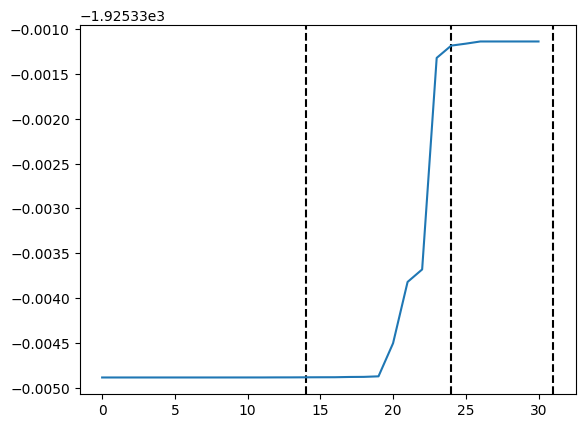

In [ ]:
import matplotlib.pyplot as plt

# full = energies[0]
# plt.axhline(y=1.6e-3, linestyle=":", color="green")
# plt.axhline(y=basic_cc.e_tot, linestyle="--", color="black")
for shell in driver.localized_system.shells:
    plt.axvline(x=shell, linestyle="--", color="black")
plt.plot(range(len(energies)), energies)
plt.show()

# Reducing the size of the active space for embedded calculations

It is important to note that the diff from full system CCSD is $\approx 6Ha$

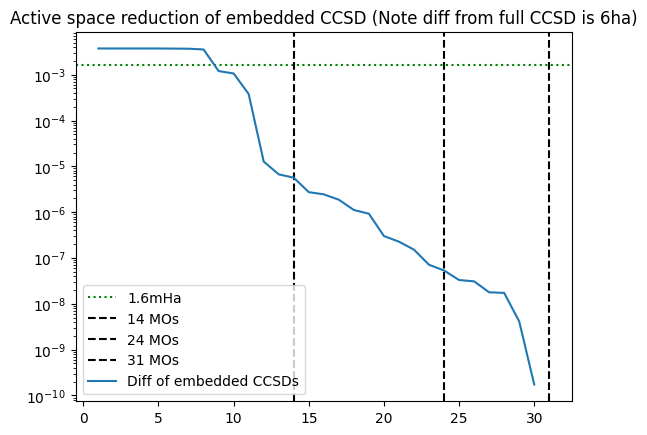

In [ ]:
import matplotlib.pyplot as plt

full = energies[0]
plt.axhline(y=1.6e-3, linestyle=":", color="green")
diffs = [abs(e - full) for e in energies[1:][::-1]]
# plt.axhline(y=basic_cc.e_tot, linestyle="--", color="black")
for shell in driver.localized_system.shells:
    plt.axvline(x=shell, linestyle="--", color="black")
plt.semilogy(range(1, driver.embedded_scf[0].mo_coeff.shape[-1]), diffs)
plt.title("Active space reduction of embedded CCSD (Note diff from full CCSD is 6ha)")
plt.legend(
    ["1.6mHa"]
    + [f"{i} MOs" for i in driver.localized_system.shells]
    + ["Diff of embedded CCSDs"]
)
plt.show()

## Building Hamiltonians

How do we build correctly build hamiltonians using reduced active space?

In [ ]:
active_sizes = [
    i for i in range(6, driver.localized_system.shells[0])
] + driver.localized_system.shells

In [ ]:
from nbed.ham_builder import HamiltonianBuilder
from openfermion.utils import count_qubits

resources = {"n_terms": [], "n_qubits": []}

for i in active_sizes:
    hb = HamiltonianBuilder(
        driver.embedded_scf[0], constant_e_shift=driver.classical_energy[0]
    )
    qham = hb.build(taper=True, core_indices=[], active_indices=[i for i in range(i)])
    resources["n_terms"].append(len(qham.terms))
    resources["n_qubits"].append(count_qubits(qham))

2024-04-11 11:38:12,614	INFO worker.py:1673 -- Started a local Ray instance.


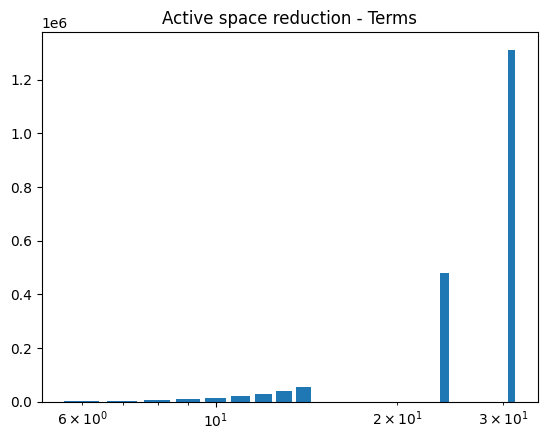

In [ ]:
import matplotlib.pyplot as plt

plt.bar(active_sizes, resources["n_terms"])
plt.xscale("log")
plt.title("Active space reduction - Terms")
plt.show()

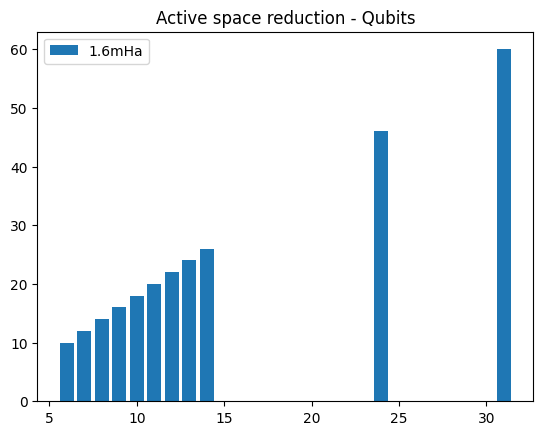

In [ ]:
plt.bar(active_sizes, resources["n_qubits"])
plt.title("Active space reduction - Qubits")
plt.legend(
    ["1.6mHa"]
    + [f"{i} MOs" for i in driver.localized_system.shells]
    + ["Diff of embedded CCSDs"]
)
plt.show()

## CCSD EMB - 1 Core

In [ ]:
from pyscf import cc
from nbed.driver import NbedDriver

args = {
    "geometry": pfoa_ordered,
    "n_active_atoms": 2,
    "basis": "sto-3g",
    "xc_functional": "b3lyp",
    "projector": "both",
    "localization": "spade",
    "convergence": 1e-6,
}
core_driver = NbedDriver(**args)

c1_energies = []
emb_ccsd, _ = core_driver._run_emb_CCSD(core_driver.embedded_scf[0])
c1_energies.append(
    emb_ccsd.e_tot
    + core_driver.e_env
    + core_driver.two_e_cross
    - core_driver._huzinaga["correction"]
    - core_driver._huzinaga["beta_correction"]
)

basic_cc = cc.CCSD(mf)
bcc_energy = basic_cc.kernel()
print(bcc_energy)

for i in range(1, core_driver.embedded_scf[0].mo_coeff.shape[-1] - 2):
    if i == 0:
        frozen = None
    else:
        frozen = [0, 1] + [i for i in range(core_driver.embedded_scf[0].mo_occ.size)][
            -i:
        ]
    emb_ccsd, _ = core_driver._run_emb_CCSD(core_driver.embedded_scf[0], frozen=frozen)
    total_e = (
        emb_ccsd.e_tot
        + core_driver.e_env
        + core_driver.two_e_cross
        - core_driver._huzinaga["correction"]
        - core_driver._huzinaga["beta_correction"]
    )
    c1_energies.append(total_e)
    print(f"Active space: {i}, Energy: {total_e}")

Initialize <pyscf.gto.mole.Mole object at 0x2a184dba0> in <pyscf.dft.rks.RKS object at 0x2a184d180>
Initialize <pyscf.gto.mole.Mole object at 0x2a184d150> in <pyscf.dft.rks.RKS object at 0x2ae95e230>
2024-04-11 11:44:25,428: nbed.driver: WARNING: Outputting both mu and huzinaga embedding results as tuple.



******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 100, nmo = 126
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-05
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 0 MB)
Init t2, MP2 energy = -1918.765844854  E_corr(MP2) -0.725267860778473
Init E_corr(CCSD) = -0.725267860794845
cycle = 1  E_corr(CCSD) = -0.820639507849909  dE = -0.0953716471  norm(t1,t2) = 0.123402
cycle = 2  E_corr(CCSD) = -0.866981838967885  dE = -0.0463423311  norm(t1,t2) = 0.0379375
cycle = 3  E_corr(CCSD) = -0.878058001887807  dE = -0.0110761629  norm(t1,t2) = 0.0172867
cycle = 4  E_corr(CCSD) = -0.885624002350656  dE = -0.00756600046  norm(t1,t2) = 0.00644623
cycle = 5  E_corr(CCSD) = -0.885438481028275  dE = 0.000185521322  norm(t1,t2) = 0.00151691
cycle = 6  E_corr(CCSD) = -0.885352207532275  dE = 8.6273496e-05  norm(t1,t2) = 0.000598703
cycle = 7  E_corr(CCSD) = -0.885350001624185  dE = 2.20590809e-06  norm(t1,t2) = 0.000179661

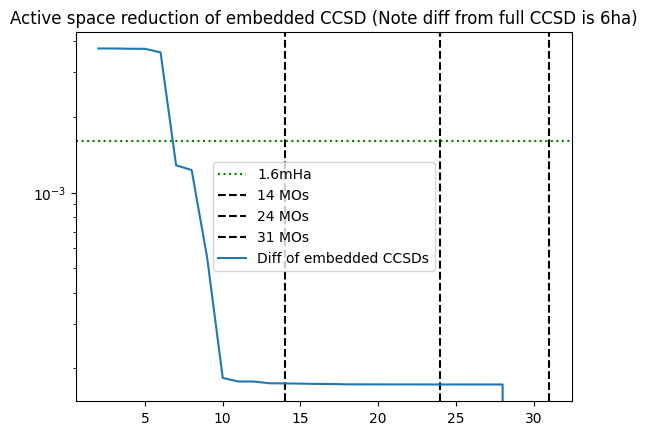

In [ ]:
import matplotlib.pyplot as plt

full = c1_energies[0]
plt.axhline(y=1.6e-3, linestyle=":", color="green")
diffs = [abs(e - full) for e in c1_energies[::-1]][1:]
# plt.axhline(y=basic_cc.e_tot, linestyle="--", color="black")
for shell in driver.localized_system.shells:
    plt.axvline(x=shell, linestyle="--", color="black")
plt.semilogy(range(2, driver.embedded_scf[0].mo_coeff.shape[-1] - 1), diffs)
plt.title("Active space reduction of embedded CCSD (Note diff from full CCSD is 6ha)")
plt.legend(
    ["1.6mHa"]
    + [f"{i} MOs" for i in driver.localized_system.shells]
    + ["Diff of embedded CCSDs"]
)
plt.show()

# Bond Stretch

In [ ]:
stretch_file_paths = [str(i) for i in Path("molecular_structures/pfoa_stretch").glob("*.xyz")]
stretch_file_paths.sort()

['molecular_structures/pfoa_stretch/pfoa_0.46878889662618933.xyz',
 'molecular_structures/pfoa_stretch/pfoa_0.9375777932523787.xyz',
 'molecular_structures/pfoa_stretch/pfoa_1.406366689878568.xyz',
 'molecular_structures/pfoa_stretch/pfoa_1.8751555865047573.xyz',
 'molecular_structures/pfoa_stretch/pfoa_2.343944483130947.xyz',
 'molecular_structures/pfoa_stretch/pfoa_2.812733379757136.xyz',
 'molecular_structures/pfoa_stretch/pfoa_3.2815222763833254.xyz',
 'molecular_structures/pfoa_stretch/pfoa_3.7503111730095147.xyz',
 'molecular_structures/pfoa_stretch/pfoa_4.219100069635704.xyz',
 'molecular_structures/pfoa_stretch/pfoa_4.687888966261894.xyz',
 'molecular_structures/pfoa_stretch/pfoa_5.156677862888083.xyz',
 'molecular_structures/pfoa_stretch/pfoa_5.625466759514272.xyz',
 'molecular_structures/pfoa_stretch/pfoa_6.0942556561404615.xyz',
 'molecular_structures/pfoa_stretch/pfoa_6.563044552766651.xyz',
 'molecular_structures/pfoa_stretch/pfoa_7.03183344939284.xyz']

In [ ]:
from pathlib import Path
from pyscf import scf

hf_bond = []
dft_bond = []
for geometry in stretch_file_paths[:2]:
    mol = Mole(atom=geometry, basis="sto-3g", verbose=4)
    mol.build()

    # Run hf for each
    hf = scf.RHF(mol)
    hf.kernel()
    hf_bond.append(hf.e_tot)

    # Run dft for each
    dft = scf.RKS(mol)
    dft.xc = "b3lyp"
    dft.max_memory = 8_000
    dft.kernel()
    dft_bond.append(dft.e_tot)

System: uname_result(system='Darwin', node='MacBook-Pro-de-Michael.local', release='23.1.0', version='Darwin Kernel Version 23.1.0: Mon Oct  9 21:32:11 PDT 2023; root:xnu-10002.41.9~7/RELEASE_ARM64_T6030', machine='arm64')  Threads 1
Python 3.10.11 (v3.10.11:7d4cc5aa85, Apr  4 2023, 19:05:19) [Clang 13.0.0 (clang-1300.0.29.30)]
numpy 1.22.4  scipy 1.9.3
Date: Thu Apr 11 11:52:48 2024
PySCF version 2.4.0
PySCF path  /Users/michaelwilliamsdelabastida/Library/Caches/pypoetry/virtualenvs/nbed-1_9TTDE1-py3.10/lib/python3.10/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 26
[INPUT] num. electrons = 200
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 F      0.056980000000  -0.458360000000  -0.080140000000 AA    0.107676594578  -0.86

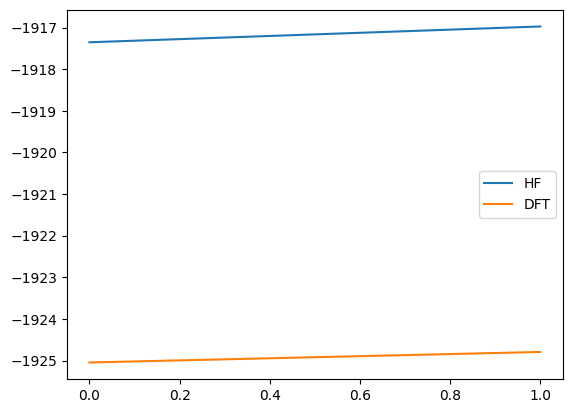

In [ ]:
plt.plot(hf_bond)
plt.plot(dft_bond)
plt.legend(["HF", "DFT"])

# Run embedding for different bond lengths

In [ ]:
for geometry in Path("molecular_structures/pfoa_stretch").glob("*.xyz"):
    driver = NbedDriver(
        geometry=str(geometry),
        n_active_atoms=2,
        basis="sto-3g",
        xc_functional="b3lyp",
        projector="both",
        localization="spade",
        convergence=1e-6,
        run_ccsd_emb=True,
    )
    # mu_builder = HamiltonianBuilder(scf_method=driver._mu["scf"], constant_e_shift=driver._mu["classical_energy"])
    huz_builder = HamiltonianBuilder(
        scf_method=driver._huzinaga["scf"],
        constant_e_shift=driver._huzinaga["classical_energy"],
    )
    # mu_qham = mu_builder.build(taper=True, core_indices=[0], active_indices=[i for i in range(1, driver.cl_shells[0])])
    huz_qham = huz_builder.build(
        taper=True,
        core_indices=[0],
        active_indices=[i for i in range(1, driver.cl_shells[0])],
    )

# Perfluorohexanesulfonate


In [ ]:
from nbed.utils import (
    pubchem_mol_geometry,
    build_ordered_xyz_string,
    save_ordered_xyz_file,
)

pfbs = pubchem_mol_geometry("Perfluorobutanesulfonate")
pfbs_xyz = build_ordered_xyz_string(pfbs, active_atom_inds=[0])
save_ordered_xyz_file("pfhs", pfbs, active_atom_inds=[0])
pfbs

{0: ('S', (-2.1366, -0.7035, -0.3567)),
 1: ('F', (-0.4707, 1.8316, -1.0186)),
 2: ('F', (0.5998, 1.8991, 0.8687)),
 3: ('F', (-0.6143, -0.3985, 1.7062)),
 4: ('F', (-1.8799, 1.2957, 1.2314)),
 5: ('F', (0.7124, -0.5316, -1.6698)),
 6: ('F', (2.0552, 1.1097, -1.2101)),
 7: ('F', (1.1709, -1.5602, 0.8975)),
 8: ('F', (2.9607, -1.3092, -0.3238)),
 9: ('F', (2.5293, 0.1037, 1.2716)),
 10: ('O', (-1.2198, -1.7018, -0.9017)),
 11: ('O', (-3.14, -1.2223, 0.5693)),
 12: ('O', (-2.6583, 0.2437, -1.341)),
 13: ('C', (0.0474, 1.0383, -0.0381)),
 14: ('C', (-1.1009, 0.3266, 0.6637)),
 15: ('C', (1.1793, 0.2264, -0.6472)),
 16: ('C', (1.9655, -0.6478, 0.2987))}

## How many orbitals in PFHS?

6-311+G $\to$ 399

## What about PFBS?

6-311+G $\to$ 297

In [ ]:
from pyscf.gto import Mole

mol = Mole(atom=pfbs_xyz[3:], basis="6-311+G", verbose=4, charge=-1)
mol.build()
mol.nao

System: uname_result(system='Darwin', node='MacBook-Pro-de-Michael.local', release='23.1.0', version='Darwin Kernel Version 23.1.0: Mon Oct  9 21:32:11 PDT 2023; root:xnu-10002.41.9~7/RELEASE_ARM64_T6030', machine='arm64')  Threads 1
Python 3.10.11 (v3.10.11:7d4cc5aa85, Apr  4 2023, 19:05:19) [Clang 13.0.0 (clang-1300.0.29.30)]
numpy 1.22.4  scipy 1.9.3
Date: Thu Apr 11 11:45:40 2024
PySCF version 2.4.0
PySCF path  /Users/michaelwilliamsdelabastida/Library/Caches/pypoetry/virtualenvs/nbed-1_9TTDE1-py3.10/lib/python3.10/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 17
[INPUT] num. electrons = 146
[INPUT] charge = -1
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 S     -2.136600000000  -0.703500000000  -0.356700000000 AA   -4.037588837746  -1.3

297

## !!DFT-D3!!

DFT-D3 allows the addition of dispersion terms in DFT, supposedly without additional cost. 

However it isnt included in PYSCF, so some add ons have to be installed (either from source or conda).

*For now we'll continue with regular B3LYP and not B3LYP-D3*

In [ ]:
from pyscf.gto import Mole
from pyscf import scf, dft
import numpy as np

basis = "sto-3g"
xcfunc = "B3LYP"

bond_energies = {}
bond_lengths = np.linspace(0, 3, 15)[1:]

for index, atom in {1: pfhs[1]}.items():
    if atom[0] == "F":
        print(f"Working on {index}:{atom}")
        bond_energies[index] = {'hf': [], 'dft': []}
        for length in bond_lengths:
            print(f"Stretching by {length}")
            xyz_string = stretch_cf_from_pubchem(pfhs, index, length)

            mol = Mole(atom=xyz_string[3:], basis=basis, verbose=4, charge=-1)
            mol.build()

            args = {
                "geometry": xyz_string,
                "n_active_atoms": 2,
                "basis": basis,
                "xc_functional": xcfunc,
                "projector": "mu",
                "localization": "spade",
                "convergence": 1e-6,
                "run_ccsd_emb": False,
                "run_fci_emb": False,
            }

            driver = NbedDriver(**args)

            # Run dft for each
            dft = scf.RKS(mol)
            dft.xc = "B3LYP"
            dft.max_memory = 8_000
            dft.max_cycle = 100
            dft.kernel()
            bond_energies[index]['dft'].append(dft.e_tot)

NameError: name 'pfhs' is not defined